In [17]:
# importing packages 

# Manipulation 
import numpy as np 
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib as mpl 

# NLP tasks 
import string 
import nltk
from collections import Counter




import os 

# os.getcwd()

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


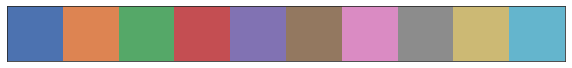

In [13]:
# Set styles 
%matplotlib inline
sns.set_style('white')
sns.set_palette('deep')

mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.frameon'] = False 

background_color = '#f6f5f5'
col_blue = '#4c72b0'
col_orange = '#dd8452'

# Set options 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Colour palette hex references 
pal = sns.color_palette('deep')
sns.palplot(pal)
print(pal.as_hex())

In [9]:
# read file into pandas using a relative path

sms_df = pd.read_csv('C:\\Users\\sanc\\Documents\\GitHub\\datasets\\spam.csv', encoding='latin-1')

# drop 3 empty columns
sms_df.dropna(axis=1, inplace=True)

sms_df.columns = ['label', 'message']
sms_df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### EDA

In [ ]:
# describe dataset 

# describe message dataset

#### Feature Engineering

In [ ]:
# convert the label to a numeric variable

In [ ]:
# extract length from message variable

In [10]:
# split and calculate average length by spam / not spam

# plot as sns.hisplot 

#### Text Preprocessing 

CLassification algorithms usually need some sort of numerical featlure vector to perform. 




In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use apply() in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:



In [ ]:
# create fucntion to process the string in the message column - to be apply() in pandas 

# first remove punctuation - we can take advantage of Python's built in string library 

In [ ]:

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [ ]:
# tokenize the message 

In [ ]:
sms['clean_msg'] = sms.message.apply(text_process)

In [ ]:
type(stopwords.words('english'))


In [ ]:

words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))